## Data Science and Business Analytics Intern @ The Sparks Foundation(GRIPOCTOBER21)

## Name - Rahul Hallimani

## Task 1 - Exploratory Data Analysis -Retail

To perform Exploratory Data Analysis on dataset "SampleSuperstore"

Aim-To find out the weak areas where you can work to make more profit.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
superstore_data=pd.read_csv(r"C:\Users\LENOVO\Desktop\SampleSuperstore.csv")

In [6]:
superstore_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
superstore_data.shape

(9994, 13)

In [10]:
superstore_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
# checking null values.
superstore_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Deleting Duplicate Rows

In [13]:
superstore_data.duplicated().sum()

17

In [14]:
superstore_data.drop_duplicates(keep='first').shape

(9977, 13)

In [15]:
superstore_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Exploratory Analysis and Visualization

### EDA State-Wise analysis

In [54]:
state_group = data.groupby(['State'])['Sales','Quantity','Profit'].mean().reset_index()

<ipython-input-54-a771c059b185>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_group = data.groupby(['State'])['Sales','Quantity','Profit'].mean().reset_index()


In [55]:
sorted_sales = state_group.sort_values(['Sales'], 
                                        ascending=False)[:10]
sorted_quantity = state_group.sort_values(['Quantity'], 
                                        ascending=False)[:10]
sorted_profit = state_group.sort_values(['Profit'], 
                                        ascending=False)[:10]

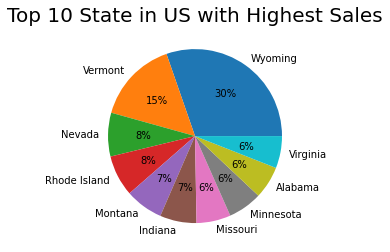

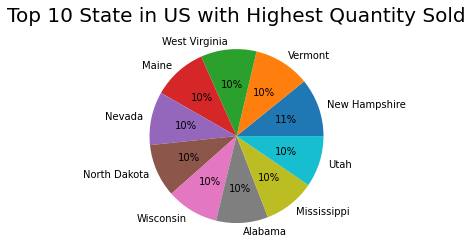

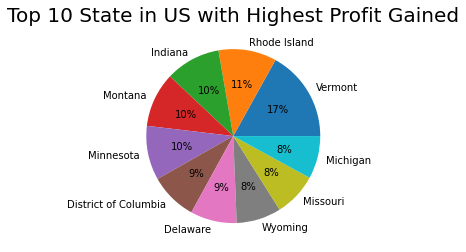

In [56]:
sales_values = sorted_sales.Sales
quantity_values = sorted_quantity.Quantity
profit_values = sorted_profit.Profit

sales_labels = sorted_sales.State
quantity_labels = sorted_quantity.State
profit_labels = sorted_profit.State

plt.pie(sales_values, labels=sales_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Sales", fontsize=20)
plt.show()

plt.pie(quantity_values, labels=quantity_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Quantity Sold", fontsize=20)
plt.show()

plt.pie(profit_values, labels=profit_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Profit Gained", fontsize=20)
plt.show()

From these graphs, we can conclude that

Wyoming sales are highest among all but with a profit of only 8%.

Almost all top 10 states have same quantity sold

Vermont State gained the highest profit among all.

### EDA Category-wise analysis


In [20]:
cat_df =superstore_data['Category'].value_counts()

In [21]:
cat_df

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

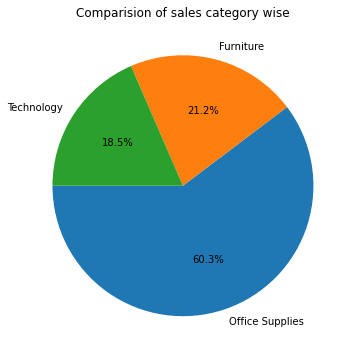

In [22]:
plt.figure(figsize=(12,6))
plt.title( "Comparision of sales category wise")
plt.pie(cat_df, labels = cat_df.index, autopct='%1.1f%%', startangle=180);

Pie chart of Comparision of sales category wise ,we can see that there are more number of office supplies followed by furniture. ans technology be the least.

In [23]:
region_df=superstore_data['Region'].value_counts()

In [24]:
region_df

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

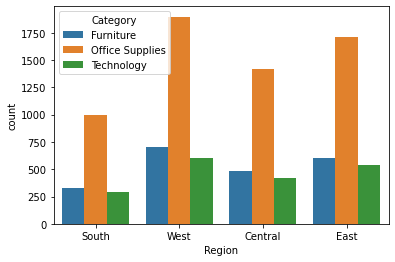

In [38]:
sns.countplot(x=superstore_data['Region'], hue=superstore_data['Category'])
plt.show()

From the Region and Category countplot the count in south region is low and in west region the count is high. we can see office supplies is large in all regions and technology be the least.

## Corelation among profit,sales,discount,quantity

superstore_corr=superstore_data.corr()
superstore_corr.drop(['Postal Code'], inplace=True, axis=1)
superstore_corr.drop(['Postal Code'], inplace=True, axis=0)
superstore_corr

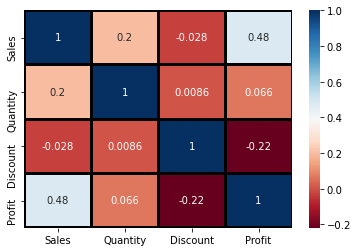

In [28]:
sns.heatmap(superstore_corr, annot=True, cmap='RdBu', linewidth=2, linecolor='black');

From the above correlation heatmap we can clearly see that profit and discount are negatively corelated i.e, when the profit is decresed then the discount also decreases. it is quite obvios that the shop owner only put discounts if he is in profits.

## Scatterplot


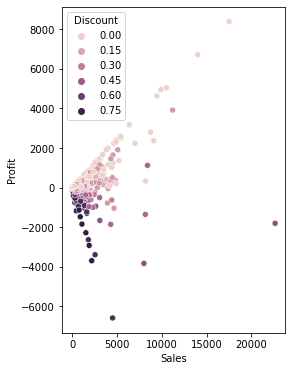

In [37]:
plt.figure(figsize = (4,6))
sns.scatterplot(x = 'Sales', y = 'Profit', data =superstore_data, hue = 'Discount')
plt.show()

It is clear that from the profit and sales scatterplot that as the Discount increases,profit goes down

## Comparing profit and sales of different categories of Products.

<ipython-input-30-a29ae4b03dec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df=superstore_data.groupby('Category')['Profit','Sales'].agg('sum')


                      Profit        Sales
Category                                 
Furniture         18451.2728  741999.7953
Office Supplies  122490.8008  719047.0320
Technology       145454.9481  836154.0330


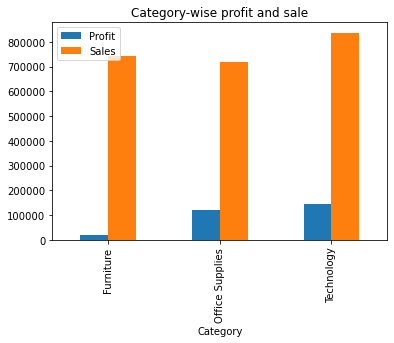

In [30]:
df=superstore_data.groupby('Category')['Profit','Sales'].agg('sum')
print(df)
df.plot.bar()
plt.legend(loc='upper left')
plt.title('Category-wise profit and sale');

In Category-wise profit and sale , we can see that the profit is highest in technology category.

## Profits in each sub-category

In [41]:
category_group = data.groupby(['Category','Sub-Category'])['Sales','Quantity','Profit'].mean().reset_index()
category_group

<ipython-input-41-e2f3e60dae3e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_group = data.groupby(['Category','Sub-Category'])['Sales','Quantity','Profit'].mean().reset_index()


,Category,Sub-Category,Sales,Quantity,Profit
0,Furniture,Bookcases,503.859633,3.807018,-15.230509
1,Furniture,Chairs,532.332420,3.818476,43.095894
2,Furniture,Furnishings,95.825668,3.723093,13.645918
3,Furniture,Tables,648.794771,3.890282,-55.565771
4,Office Supplies,Appliances,230.755710,3.710300,38.922758
5,Office Supplies,Art,34.068834,3.768844,8.200737
6,Office Supplies,Binders,133.560560,3.922521,19.843574
7,Office Supplies,Envelopes,64.867724,3.566929,27.418019
8,Office Supplies,Fasteners,13.936774,4.211982,4.375660
9,Office Supplies,Labels,34.303055,3.846154,15.236962


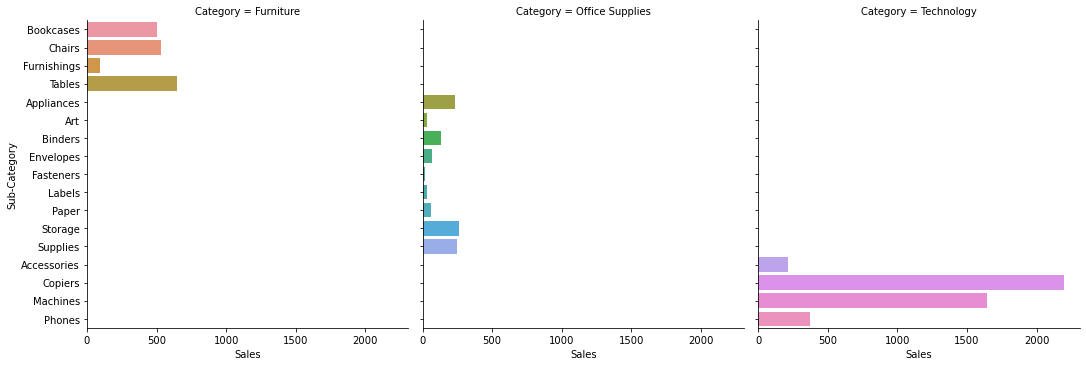

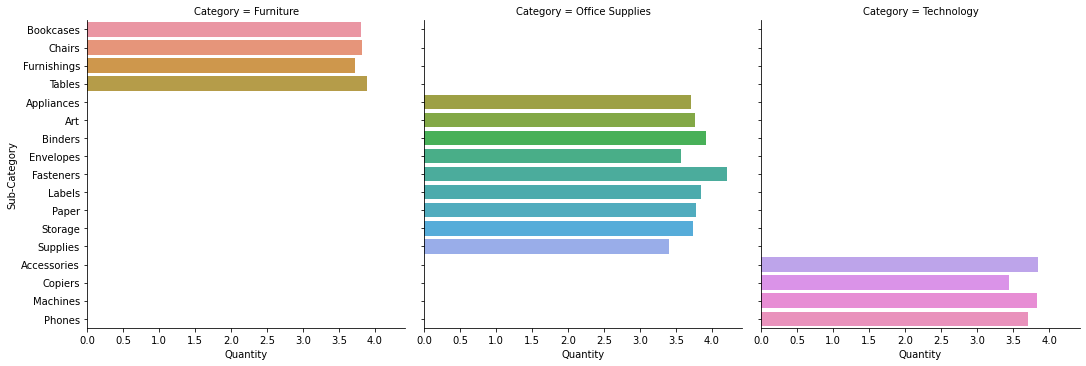

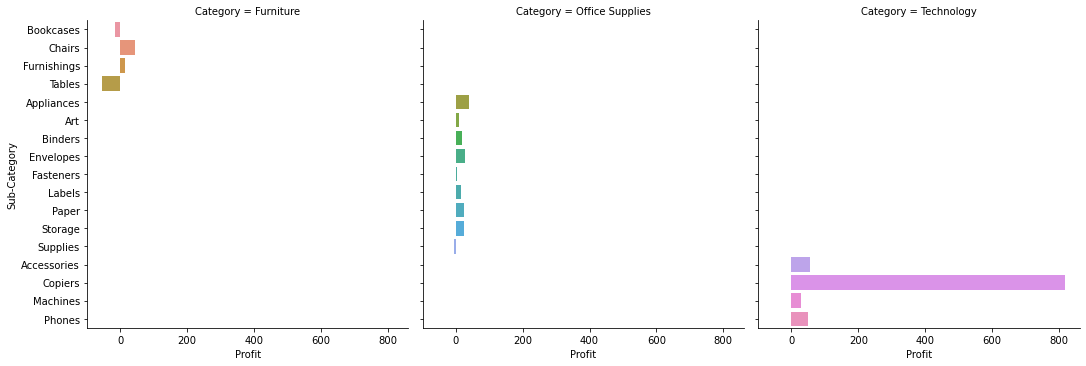

In [42]:
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

y = sns.catplot(x="Quantity", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

From these graphs, we can conclude that

In technology category, Sales are more than other two category.

In technology category, Copiers and Machines are sold the most.

Quantity of products are almost sold in equal amount in each category.

In Furniture category, Bookcases and Tables are incurring a lose.

In Office Supplies category, there is a very minimal profit in all sub-categories.

In technology category, Copiers provide the most profit among all others.

## EDA Segment-Wise

In [43]:
segment_group = data.groupby(['Segment'])['Sales','Quantity','Profit'].mean().reset_index()

<ipython-input-43-ab6373fa1de8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segment_group = data.groupby(['Segment'])['Sales','Quantity','Profit'].mean().reset_index()


In [44]:
segment_group

,Segment,Sales,Quantity,Profit
0,Consumer,223.733644,3.760547,25.836873
1,Corporate,233.823300,3.843709,30.456667
2,Home Office,240.972041,3.782389,33.818664


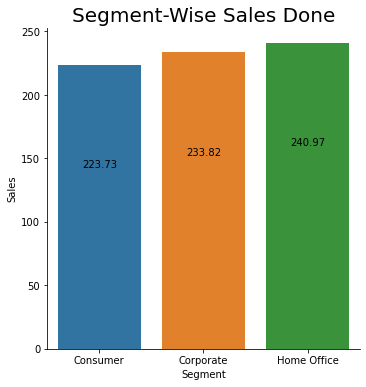

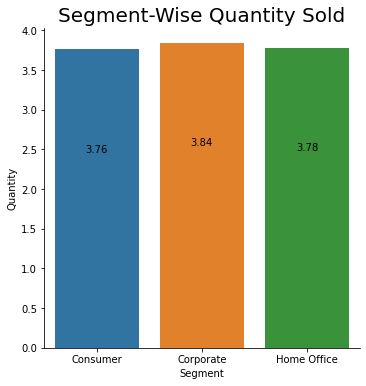

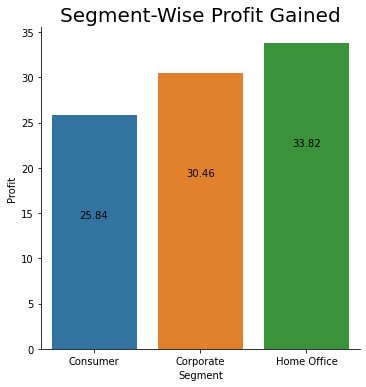

In [46]:
x = sns.catplot(x="Segment", y="Sales", data=segment_group, kind='bar')
for ax in x.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Sales Done", fontsize=20)

y = sns.catplot(x="Segment", y="Quantity", data=segment_group, kind='bar')
for ax in y.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Quantity Sold", fontsize=20)

z = sns.catplot(x="Segment", y="Profit", data=segment_group, kind='bar')
for ax in z.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Profit Gained", fontsize=20)

plt.show()

From these graphs, we can conclude that

All types of Segments have shown almost same number of sales.

All types of Segments have shown almost same number of quantity sold.

Profit gained in the Home Office segment is higher comparing other two segments and Consumer Segment being the lowest.

## EDA Region-Wise

In [47]:
region_group = data.groupby(['Region'])['Sales','Quantity','Profit'].mean().reset_index()

<ipython-input-47-aac360856b1c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_group = data.groupby(['Region'])['Sales','Quantity','Profit'].mean().reset_index()


In [48]:
region_group.head(10)

,Region,Sales,Quantity,Profit
0,Central,215.772661,3.779595,17.092709
1,East,238.336110,3.728230,32.135808
2,South,241.803645,3.832716,28.857673
3,West,226.493233,3.829535,33.849032


<Figure size 1008x504 with 0 Axes>

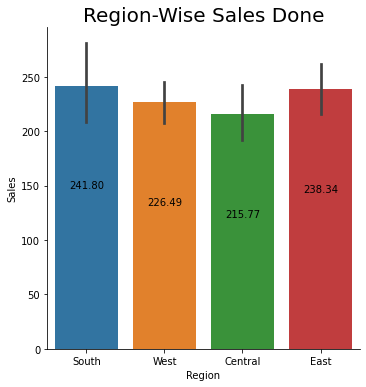

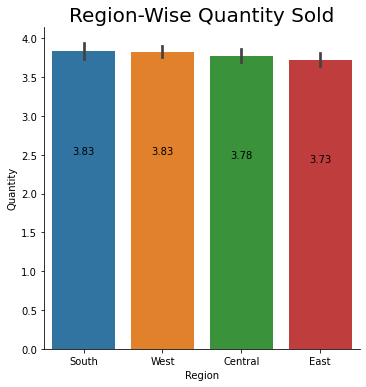

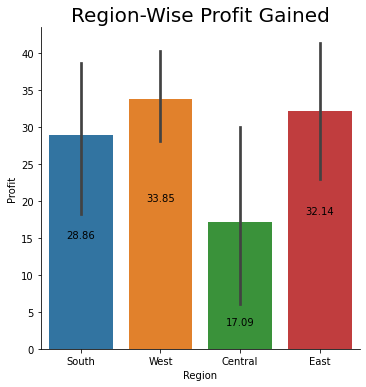

In [49]:
fig = plt.figure(figsize=(14,7))
a = sns.catplot(x='Region',
                y='Sales',
                data=data,
                kind='bar')
for ax in a.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region-Wise Sales Done", fontsize=20)

b = sns.catplot(x='Region',
                y='Quantity',
                data=data,
                kind='bar')
for ax in b.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region-Wise Quantity Sold", fontsize=20)

c = sns.catplot(x='Region',
                y='Profit',
                data=data,
                kind='bar')
for ax in c.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region-Wise Profit Gained", fontsize=20)
plt.show()


From these graphs, we can conclude that

Sales are more in Southern and Eastern part of US.

Quantity of products sold in all the regions are almost same and not much of difference.

Profit gained in Western part of US is comparatively higher followed by Eastern part, Southern part then Central part of US.

## EDA Ship Mode Wise

In [50]:
shipmode_group = data.groupby(['Ship Mode'])['Sales','Quantity','Profit'].mean().reset_index()

<ipython-input-50-01886f39bf91>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shipmode_group = data.groupby(['Ship Mode'])['Sales','Quantity','Profit'].mean().reset_index()


In [51]:
shipmode_group

,Ship Mode,Sales,Quantity,Profit
0,First Class,228.497024,3.701560,31.839948
1,Same Day,236.396179,3.609576,29.266591
2,Second Class,236.089239,3.816452,29.535545
3,Standard Class,227.583067,3.819873,27.494770


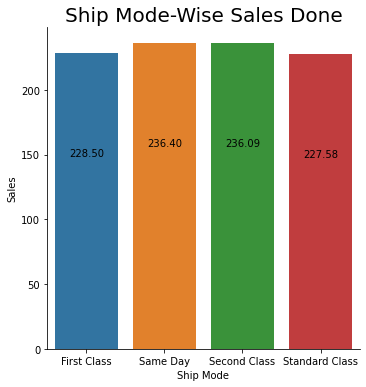

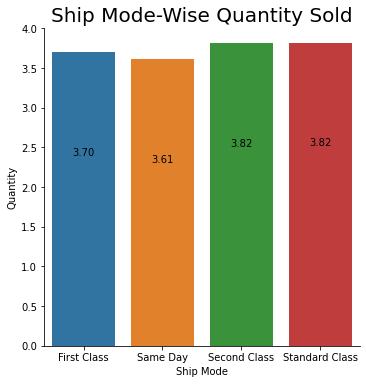

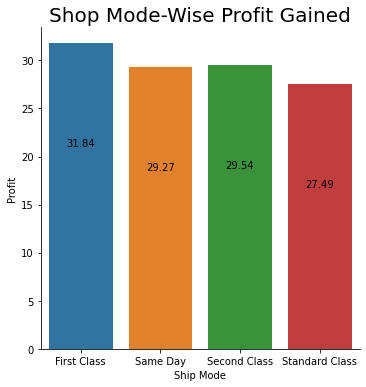

In [52]:
x = sns.catplot(x="Ship Mode", y="Sales", data=shipmode_group, kind='bar')
for ax in x.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode-Wise Sales Done", fontsize=20)

y = sns.catplot(x="Ship Mode", y="Quantity", data=shipmode_group, kind='bar')
for ax in y.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode-Wise Quantity Sold", fontsize=20)

z = sns.catplot(x="Ship Mode", y="Profit", data=shipmode_group, kind='bar')
for ax in z.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Shop Mode-Wise Profit Gained", fontsize=20)
plt.show()

From these graphs, we can conclude that ship mode doesn't affect the Profit, Sales and Quantity. All types of Ship Mode show the almost same values.



## Business problems that can be derived by looking into the data?

How much is the sales, profit and quantity sold varies region-wise, state-wise and segment-wise, category-wise?

Which category of items gives the more profit and sold more?

Which type of mode is suitable for more profit?

Which country has the highest profit?

Which region has the highest sales and profit?






## From all the EDAs done above, we can infer that

Technology Category are in demand. So if production in this field will be more, then company can get more profit.

Profit gain is highest in Home-Office segment. Company must emphasise more to Home-Office segment.

People in the South and East prefer most of the goods. Company must spread out their products in these part of US.

Profit are highest in Western part of US. Company should produce more in this part of US but must come with a plan to increase the sales.

Wyoming State have highest sales and Vermont State have the highest Profit. Company must place all types of products in these states for more profit and sales.